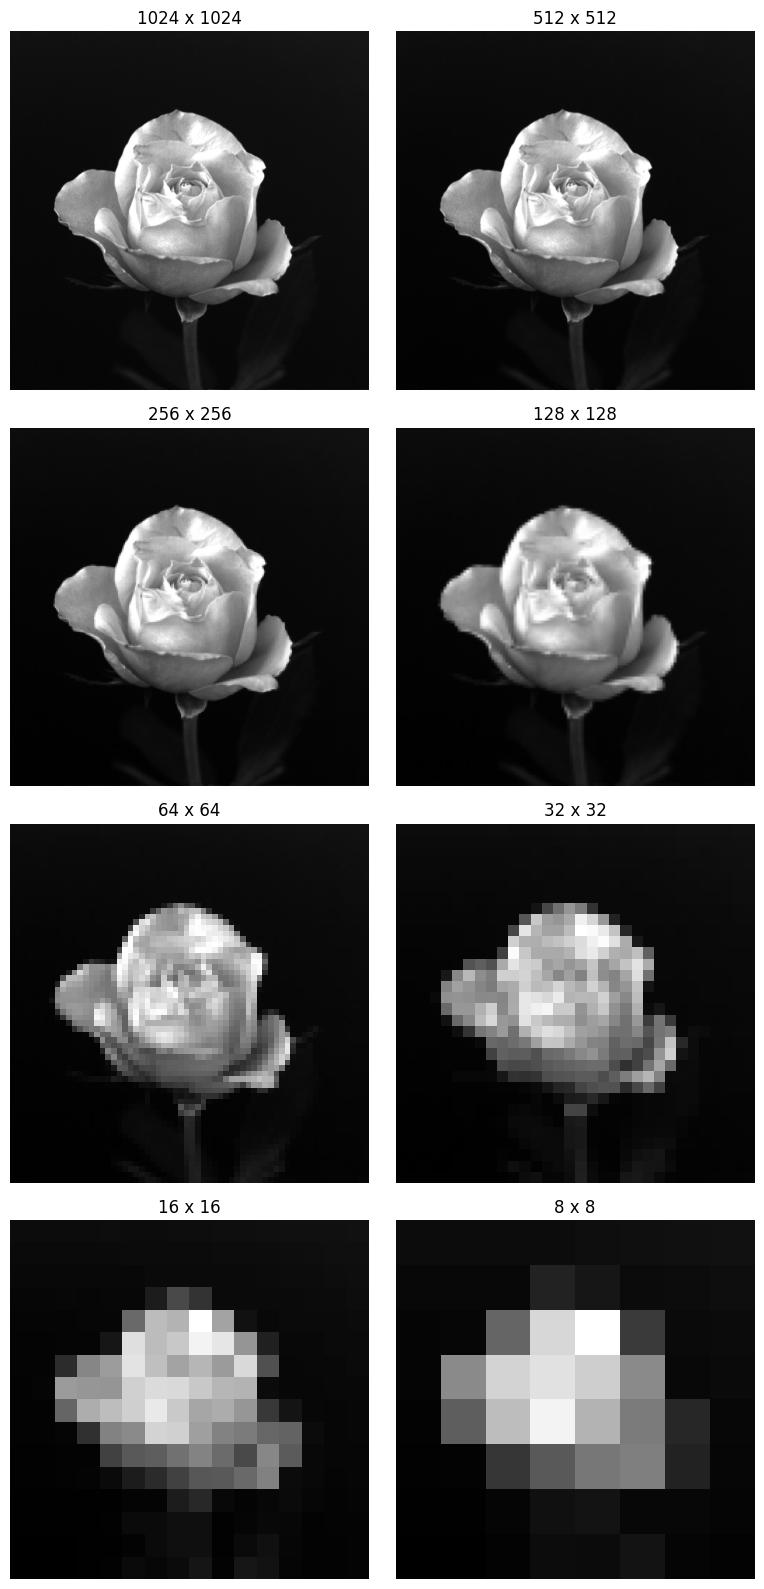

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def downscale(img):
    size = img.shape[0]

    down_img = np.zeros((size//2, size//2))

    for i in range(size//2):
        for j in range(size//2):
            down_img[i, j] = (int(img[2*i, 2*j]) + 
                              int(img[2*i+1, 2*j]) + 
                              int(img[2*i, 2*j+1]) + 
                              int(img[2*i+1, 2*j+1]))//4
    return down_img
rose = cv2.imread(r"Rose 1024 1024.tif", cv2.IMREAD_GRAYSCALE)

rose512 = downscale(rose)
rose256 = downscale(rose512)
rose128 = downscale(rose256)
rose64 = downscale(rose128)
rose32 = downscale(rose64)
rose16 = downscale(rose32)
rose8 = downscale(rose16)

plt.figure(figsize=(8, 16))

plt.subplot(4, 2, 1)
plt.imshow(rose, cmap='gray')
plt.title("1024 x 1024")
plt.axis('off')

plt.subplot(4, 2, 2)
plt.imshow(rose512, cmap='gray')
plt.title("512 x 512")
plt.axis('off')

plt.subplot(4, 2, 3)
plt.imshow(rose256, cmap='gray')
plt.title("256 x 256")
plt.axis('off')

plt.subplot(4, 2, 4)
plt.imshow(rose128, cmap='gray')
plt.title("128 x 128")
plt.axis('off')

plt.subplot(4, 2, 5)
plt.imshow(rose64, cmap='gray')
plt.title("64 x 64")
plt.axis('off')

plt.subplot(4, 2, 6)
plt.imshow(rose32, cmap='gray')
plt.title("32 x 32")
plt.axis('off')

plt.subplot(4, 2, 7)
plt.imshow(rose16, cmap='gray')
plt.title("16 x 16")
plt.axis('off')

plt.subplot(4, 2, 8)
plt.imshow(rose8, cmap='gray')
plt.title("8 x 8")
plt.axis('off')

plt.tight_layout()
plt.show()

MSE for 128x128 upscale: 48.51654052734375
MSE for 256x256 upscale: 32.630218505859375
MSE for 512x512 upscale: 25.011653900146484


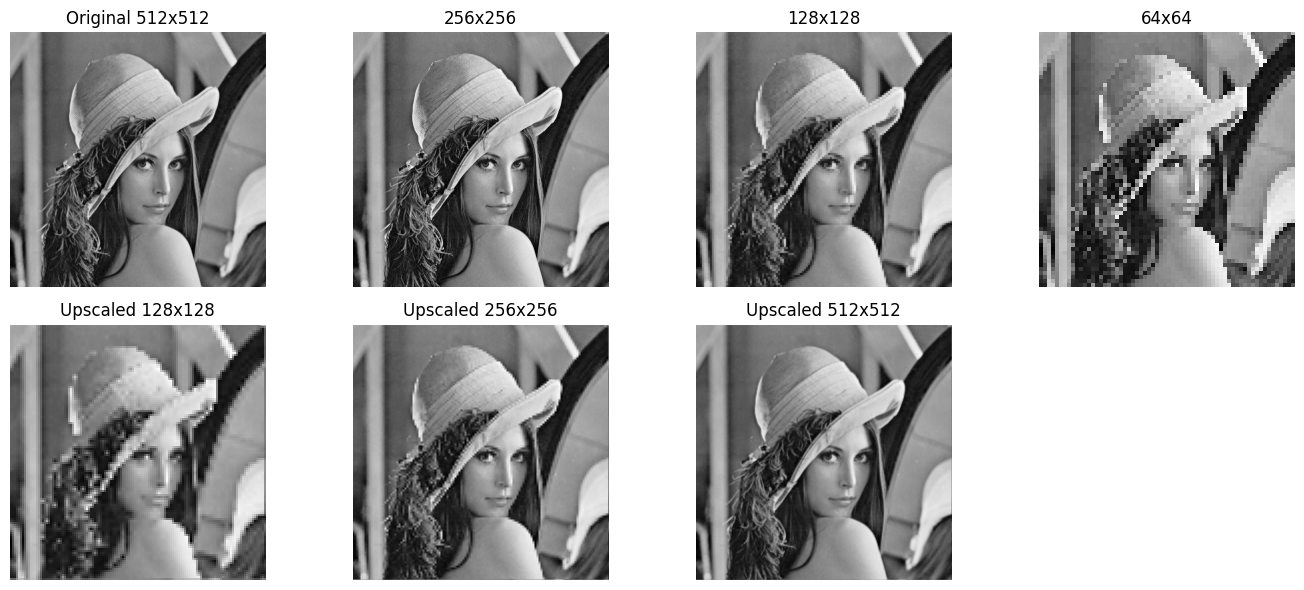

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# custom upscale function (2x)
def upscale(img):

    h, w = img.shape[:2]

    up_h, up_w = h * 2, w * 2
    up_img = np.zeros((up_h, up_w), dtype=np.uint8)

    # fill known pixels and interpolate horizontally/vertically
    for i in range(h):
        for j in range(w):

            up_img[2*i, 2*j] = img[i, j]

            next_j = (j + 1) % w
            up_img[2*i, 2*j+1] = (int(img[i, j]) + int(img[i, next_j])) // 2

            next_i = (i + 1) % h
            up_img[2*i+1, 2*j] = (int(img[i, j]) + int(img[next_i, j])) // 2

    # fill diagonal pixels
    for i in range(h):
        for j in range(w):

            row = 2*i + 1
            col = 2*j + 1

            top = up_img[row-1, col]
            bottom = up_img[(row+1) % up_h, col]
            left = up_img[row, col-1]
            right = up_img[row, (col+1) % up_w]

            up_img[row, col] = (int(top) + int(bottom) + int(left) + int(right)) // 4

    return up_img


# load image
lenna_path = r"lena_gray_512.tif"
lenna = cv2.imread(lenna_path, cv2.IMREAD_GRAYSCALE)

# downscale images
lenna256 = cv2.resize(lenna, (256, 256), cv2.INTER_AREA)
lenna128 = cv2.resize(lenna, (128, 128), cv2.INTER_AREA)
lenna64 = cv2.resize(lenna, (64, 64), cv2.INTER_AREA)

# upscale back
lenna_up128 = upscale(lenna64)
lenna_up256 = upscale(lenna128)
lenna_up512 = upscale(lenna256)

# calculate MSE
mse_128 = np.mean((lenna_up128 - lenna128) ** 2)
mse_256 = np.mean((lenna_up256 - lenna256) ** 2)
mse_512 = np.mean((lenna_up512 - lenna) ** 2)

print(f"MSE for 128x128 upscale: {mse_128}")
print(f"MSE for 256x256 upscale: {mse_256}")
print(f"MSE for 512x512 upscale: {mse_512}")

# plotting
plt.figure(figsize=(14, 6))

plt.subplot(2, 4, 1)
plt.imshow(lenna, cmap='gray')
plt.title('Original 512x512')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(lenna256, cmap='gray')
plt.title('256x256')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(lenna128, cmap='gray')
plt.title('128x128')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(lenna64, cmap='gray')
plt.title('64x64')
plt.axis('off')

plt.subplot(2, 4, 5)
plt.imshow(lenna_up128, cmap='gray')
plt.title('Upscaled 128x128')
plt.axis('off')

plt.subplot(2, 4, 6)
plt.imshow(lenna_up256, cmap='gray')
plt.title('Upscaled 256x256')
plt.axis('off')

plt.subplot(2, 4, 7)
plt.imshow(lenna_up512, cmap='gray')
plt.title('Upscaled 512x512')
plt.axis('off')

plt.tight_layout()
plt.show()


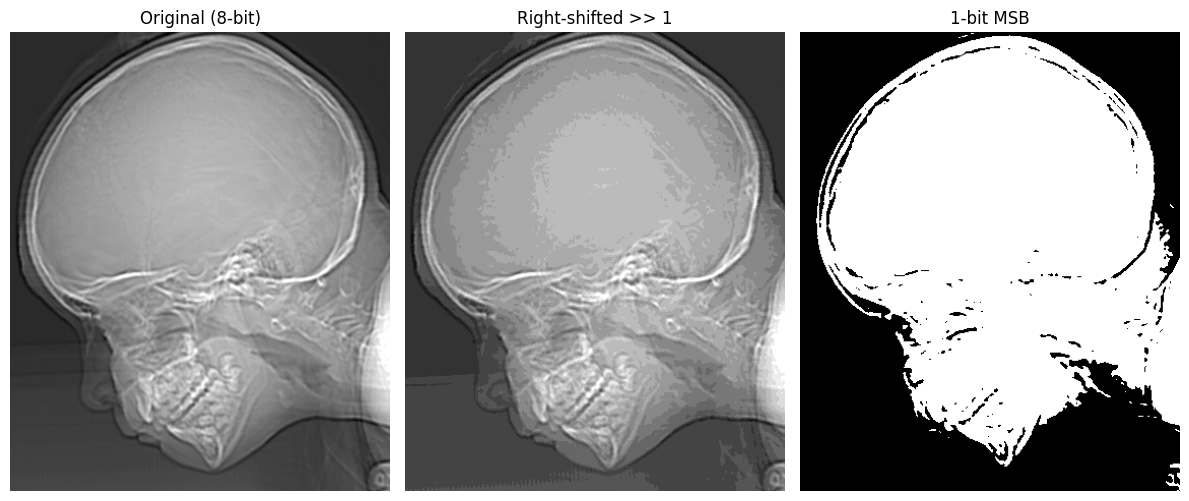

Saved 1-bit image to: D:\CODING\DIP\LAB2\Skull 374 452 Rightshifted_1bit.tif


In [12]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

def rightshift_to_1bit_image(input_image_path, output_image_path, show=True):

    # read image
    arr = cv2.imread(input_image_path, cv2.IMREAD_UNCHANGED)

    # convert to grayscale if needed
    if arr.ndim == 3:
        arr = cv2.cvtColor(arr, cv2.COLOR_BGR2GRAY)

    # convert to 8-bit if image is 16-bit
    if arr.dtype == np.uint16:
        arr8 = (arr >> 8).astype(np.uint8)
    else:
        arr8 = arr.astype(np.uint8)

    # right shift by 1
    shifted = (arr8 >> 4).astype(np.uint8)

    # extract MSB (1-bit image)
    one_bit = (arr8 >> 7).astype(np.uint8)

    # convert for display
    orig_display = arr8
    shifted_display = shifted
    onebit_display = (one_bit * 255).astype(np.uint8)

    # PIL images
    pil_onebit = Image.fromarray(onebit_display)

    # show images
    if show:
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 3, 1)
        plt.imshow(orig_display, cmap='gray')
        plt.title("Original (8-bit)")
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(shifted_display, cmap='gray')
        plt.title("Right-shifted >> 1")
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(onebit_display, cmap='gray')
        plt.title("1-bit MSB")
        plt.axis('off')

        plt.tight_layout()
        plt.show()

    # create output folder if not exists
    out_dir = os.path.dirname(output_image_path)
    if out_dir and not os.path.exists(out_dir):
        os.makedirs(out_dir, exist_ok=True)

    # save result
    pil_onebit.save(output_image_path)
    print("Saved 1-bit image to:", output_image_path)


if __name__ == "__main__":

    # input and output paths (updated)
    input_image_path = r"D:\CODING\DIP\LAB2\Skull 374 452.tif"
    output_image_path = r"D:\CODING\DIP\LAB2\Skull 374 452 Rightshifted_1bit.tif"

    rightshift_to_1bit_image(input_image_path, output_image_path)


MSE between custom upscale and OpenCV Bilinear: 12.9921875


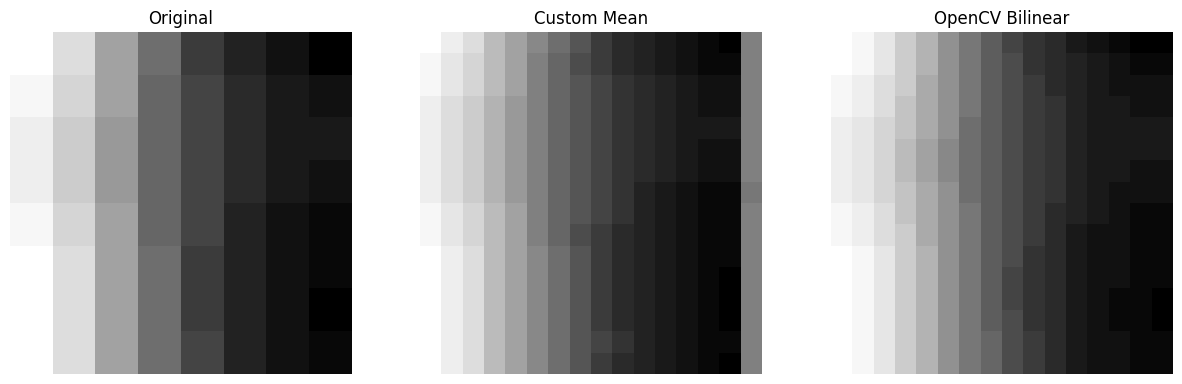

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def upscale(img):
    
    h, w = img.shape[:2]
   
    up_h, up_w = h * 2, w * 2
    up_img = np.zeros((up_h, up_w), dtype=np.uint8)

    
    for i in range(h):
        for j in range(w):
            
            up_img[2*i, 2*j] = img[i, j]
            
            
            next_j = (j + 1) % w
            up_img[2*i, 2*j+1] = (int(img[i, j]) + int(img[i, next_j])) // 2
            
            
            next_i = (i + 1) % h
            up_img[2*i+1, 2*j] = (int(img[i, j]) + int(img[next_i, j])) // 2

    
    for i in range(h):
        for j in range(w):
            
            row = 2*i + 1
            col = 2*j + 1
            
            
            top = up_img[row-1, col]
            bottom = up_img[(row+1) % up_h, col]
            left = up_img[row, col-1]
            right = up_img[row, (col+1) % up_w]
            
            up_img[row, col] = (int(top) + int(bottom) + int(left) + int(right)) // 4

    return up_img

def compare_results(path):
    
    original = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if original is None:
        print(f"Image not found at: {path}")
        return

    
    custom_res = upscale(original)
    
    # OpenCV's standard Bilinear for comparison (matching your 2x logic)
    cv2_res = cv2.resize(original, (original.shape[1]*2, original.shape[0]*2), interpolation=cv2.INTER_LINEAR)
    mse = np.mean((custom_res - cv2_res) ** 2)
    print(f"MSE between custom upscale and OpenCV Bilinear: {mse}")
    # Display
    titles = ['Original', 'Custom Mean', 'OpenCV Bilinear']
    images = [original, custom_res, cv2_res]
    
    plt.figure(figsize=(15, 5))
    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Replace with your actual path
compare_results(r"Jeevanjot 8 8.jpeg")